# Magic squares

A magic square is an $n \times n$ matrix with integer elements from 1 to $n \times n$ arranged in such a way that the sum of the rows, columns, diagonals is equal.

In [8]:
import numpy as np
from itertools import permutations

Define a function that checks whether a given 2D array is a magic scuare.

In [12]:
def is_magic(square):
    n = square.shape[0]
    target = sum(square[i, n - 1 - i] for i in range(n))
    return (np.all(square.sum(axis=1) == target) and
            np.all(square.sum(axis=0) == target) and
            square.trace() == target)

Define a function that returns a list of all $n \times n$ magic square squares.

In [14]:
def all_magic_squares(dim):
    magic = list()
    for elements in permutations(range(1, 1 + dim**2)):
        square = np.array(elements).reshape((dim, dim))
        if is_magic(square):
            magic.append(square)
    return magic

Compute the $2 \times 2$ magic squares.

In [15]:
all_magic_squares(2)

[]

There are no $2 \times 2$ magic squares.

Compute the $3 \times 3$ magic squares.

In [32]:
squares3 = all_magic_squares(3)

In [33]:
len(squares3)

8

There are only 8 magic squares out of  $3^2!$ squares, displayed below.

In [36]:
for square in squares3:
    print(square, end='\n\n')

[[2 7 6]
 [9 5 1]
 [4 3 8]]

[[2 9 4]
 [7 5 3]
 [6 1 8]]

[[4 3 8]
 [9 5 1]
 [2 7 6]]

[[4 9 2]
 [3 5 7]
 [8 1 6]]

[[6 1 8]
 [7 5 3]
 [2 9 4]]

[[6 7 2]
 [1 5 9]
 [8 3 4]]

[[8 1 6]
 [3 5 7]
 [4 9 2]]

[[8 3 4]
 [1 5 9]
 [6 7 2]]



Let's estimate how long it would take to compute all $4 \times 4$ magic squares.

In [25]:
from math import factorial
import matplotlib.pyplot as plt
%matplotlib inline

Plot the number of squares as a function of the shape.

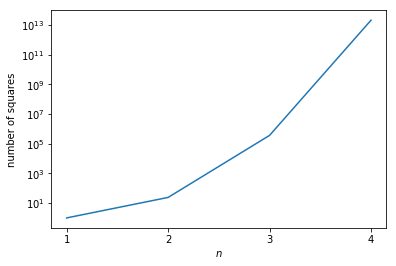

In [29]:
n = range(1, 5)
f = [factorial(i**2) for i in n]
_ = plt.semilogy(n, f)
_ = plt.xticks(n, [str(i) for i in n])
_ = plt.xlabel('$n$')
_ = plt.ylabel('number of squares')

It seems that the number of squares increases sharply as a function of $n$.  Time the generation of $3 \times 3$ squares, and use this to estimate the number of days required for computing the $4 \times 4$ squares.

In [37]:
%timeit all_magic_squares(3)

6.17 s ± 146 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
print(f'{(6.2*factorial(4**2)//factorial(3**2))/(3600*24):.0f}')

4137
